Channel flow with constant $dP/dx$. The channel height is 2 and $-L<y<L$. 
The ODE equation is
\begin{equation}
\mu \frac{\partial^2 u}{\partial y^2}=-\frac{dP}{dx}
\end{equation}
Two set of boundary conditions:\
Set 1. $u(-1)=u(1)=0$ Homogeneous BC \
Set 2. $u(-1)=0$ and $u(1)=u_0$

We are going to solve the problem of the channel using the spectral method. In the following we ae going to apply the Chebyshev collocation method. 

In [2]:
#Importing the packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from numpy.polynomial import chebyshev as C

In [26]:
#We define the Chabyshev nodes from -1 to 1
L=1
mu=0.2
y=np.linspace(-L,L,100)
dp=-1 #Negative
u0=1

# Chebyshev nodes
N=8
xn=np.cos(np.arange(0,N)/(N-1)*np.pi)

In [28]:
#We compute the matrix. NOTE that the matrix is filled
c=np.array([1,2])
D1=np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if i==0 or i==N-1:
            II=1 
        else:
            II=0
        if j==0 or j==N-1:
            JJ=1 
        else:
            JJ=0
        if i!=j:
            D1[i,j]=(c[II]*(-1)**(i+j))/(c[JJ]*(xn[i]-xn[j]))
        elif i==j and i!=0 and i!=N-1:
            D1[i,j]=-xn[i]/(2*(1-xn[i]**2))
        

D1[0,0]=(2*(N-1)**2+1)/6
D1[N-1,N-1]=-D1[0,0]

D2=np.dot(D1,D1)


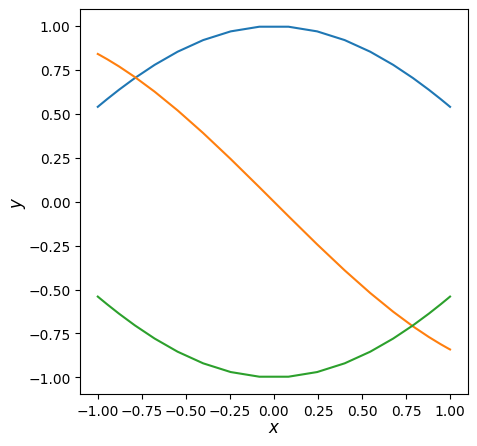

In [7]:
#We test the derivative

y=np.cos(xn)

yp=np.dot(D1,y);

ypp=np.dot(D2,y);

fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111)
plt.plot(xn,y)
plt.plot(xn,yp)
plt.plot(xn,ypp)
plt.xlabel('$x$', fontsize=12, labelpad=0.05)
plt.ylabel('$y$', fontsize=12, labelpad=0.05)
plt.show()

In [29]:
#We write the algebraic system to solve
D=mu*D2;

D[0,:]=np.append(1,np.zeros(N-1))
D[-1,:]=np.append(np.zeros(N-1),1)

f=dp*np.ones(N)
f[0]=0
f[-1]=0

un=np.linalg.solve(D,f)

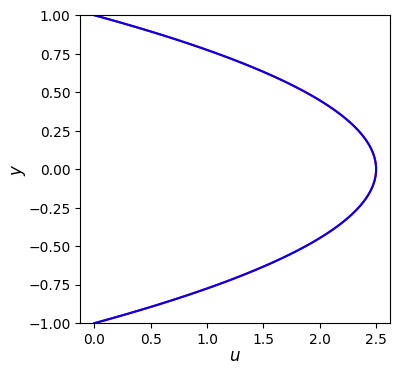

In [30]:
#We compare the result with the analitical result
y=np.linspace(-L,L,100)
u= -dp*L**2/(2*mu)*(1-y**2/L**2)

coeff=C.chebfit(xn,un,N)

Un=np.zeros(100,)
for j in range(0,N):
    T=np.cos(j*np.arccos(y))
    Un=Un+coeff[j]*T

fig=plt.figure(figsize=(4,4))
ax=plt.subplot(111)
plt.plot(u,y,color='red',linewidth=1.5)
plt.plot(Un,y,color='blue')
plt.xlabel('$u$', fontsize=12, labelpad=0.05)
plt.ylabel('$y$', fontsize=12, labelpad=0.05)
plt.ylim([-1, 1])
plt.show()


In [13]:
coeff=C.chebfit(un,xn,N)


[-2.32033546e-10  4.09204636e-10 -2.76585274e-10  1.36274109e-10
 -4.29828635e-11  4.00416449e-12  1.75603902e-12 -1.72217824e-13
 -8.06381807e-14 -6.51395299e-15  1.20954750e-15  4.85636568e-16
  9.03491362e-17  9.65870179e-18 -2.95358145e-19 -4.66403718e-19
 -1.44038509e-19 -2.94440924e-20 -3.65467581e-21  2.45581648e-22
  3.56730439e-22]
